In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({"font.size": 16})

In [2]:
df = pd.read_excel("bootstrap_results.xlsx", index_col="Iteration")
df


,Network type,loss,accuracy,val_loss,val_accuracy,test_accuracy
Iteration,,,,,,
0,LeNet-5,0.656921,0.637143,0.687500,0.580645,0.500000
1,LeNet-5,0.603865,0.680000,0.637581,0.661290,0.545455
2,LeNet-5,0.692842,0.537143,0.689131,0.564516,0.454545
3,LeNet-5,0.665488,0.660000,0.683987,0.629032,0.454545
4,LeNet-5,0.705592,0.497143,0.709159,0.500000,0.500000
5,LeNet-5,0.673994,0.611429,0.683659,0.629032,0.636364
6,LeNet-5,0.697924,0.497143,0.694050,0.580645,0.590909
7,LeNet-5,0.686061,0.531429,0.686067,0.580645,0.636364
8,LeNet-5,0.658502,0.651429,0.704086,0.580645,0.772727


In [3]:
df.groupby(by="Network type", sort=False).mean()


,loss,accuracy,val_loss,val_accuracy,test_accuracy
Network type,,,,,
LeNet-5,0.672745,0.587715,0.686564,0.590322,0.550000
AlexNet,0.107760,0.955429,0.852461,0.838710,0.477273
VGG16,0.245656,0.883429,0.654959,0.800000,0.500000
VGG16_pretrained,0.220599,0.952286,0.202905,0.974194,0.495455
ResNet50_pretrained,0.663727,0.576286,0.655645,0.666129,0.509091


In [4]:
df.groupby(by="Network type", sort=False).std()


,loss,accuracy,val_loss,val_accuracy,test_accuracy
Network type,,,,,
LeNet-5,0.029304,0.069217,0.019179,0.043810,0.110201
AlexNet,0.119732,0.053064,0.441435,0.037248,0.080887
VGG16,0.187280,0.103557,0.195359,0.054219,0.090909
VGG16_pretrained,0.019988,0.009810,0.032921,0.021772,0.114291
ResNet50_pretrained,0.017004,0.044366,0.014857,0.052705,0.087827


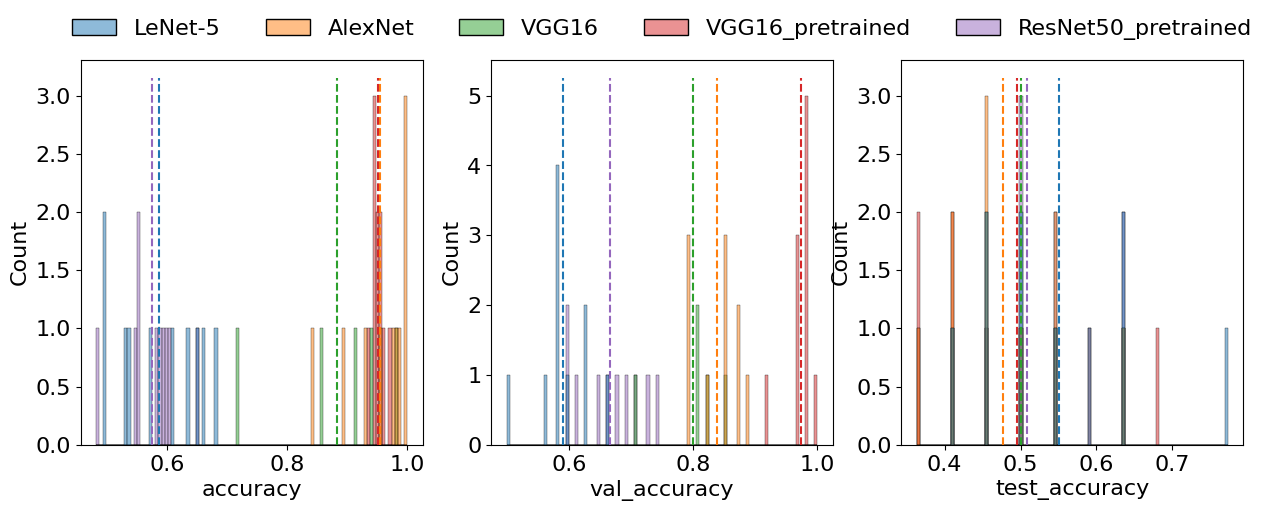

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
dataset = ["accuracy", "val_accuracy", "test_accuracy"]
neural_nets = ["LeNet-5", "AlexNet", "VGG16", "VGG16_p", "ResNet50_p"]
palette = sns.color_palette()

for a, ax in enumerate(axs):
    hist = sns.histplot(
        data=df, x=dataset[a], hue="Network type", bins=100, ax=ax, color=palette[a]
    )
    ymin, ymax = hist.get_ylim()
    ax.vlines(
        df.groupby(by="Network type", sort=False)[dataset[a]].mean(),
        ymin=ymin,
        ymax=ymax,
        linestyles="dashed",
        colors=palette,
    )

axs[0].get_legend().remove()
axs[2].get_legend().remove()
sns.move_legend(
    axs[1], "lower center", bbox_to_anchor=(0.5, 1), ncol=5, title=None, frameon=False
)


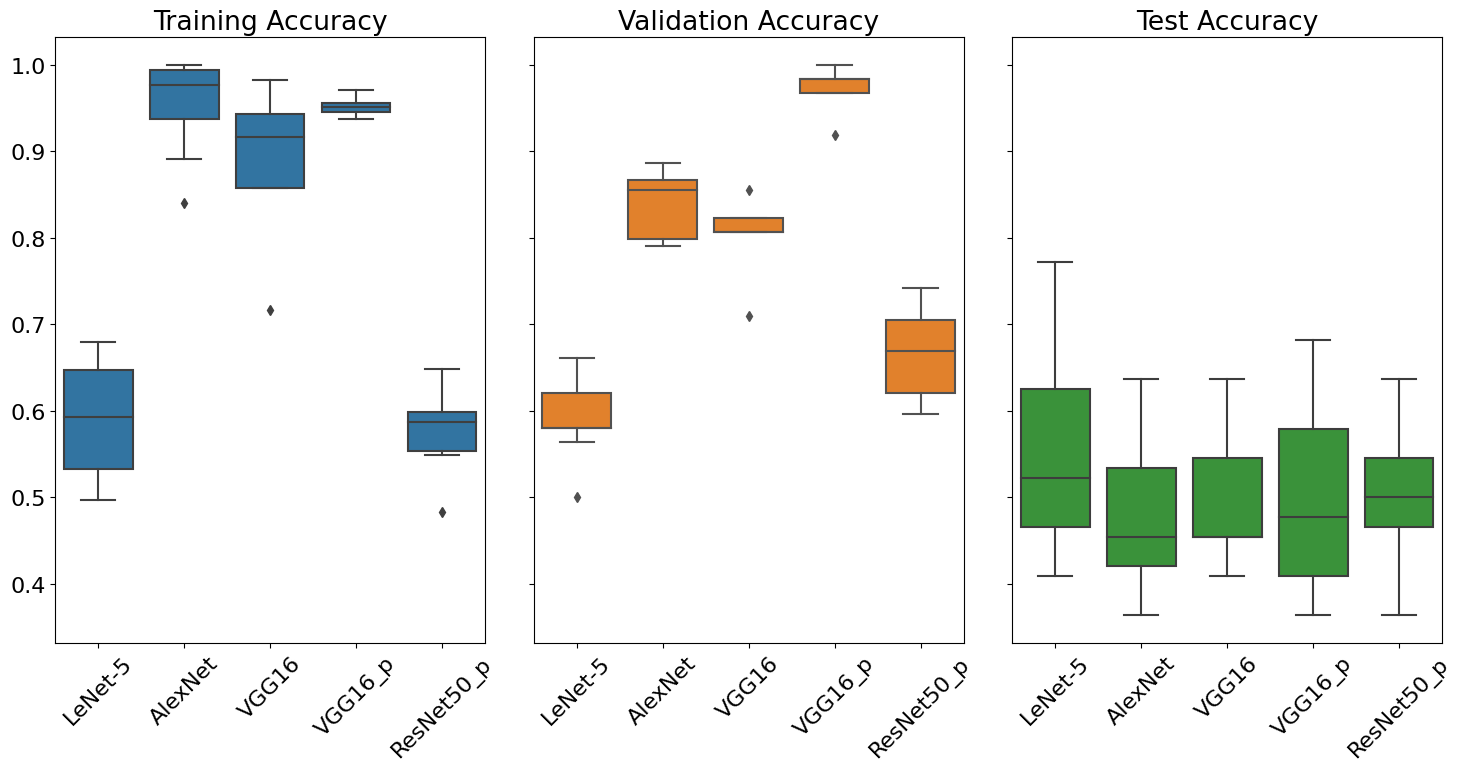

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8), tight_layout=True, sharey=True)
title = ["Training Accuracy", "Validation Accuracy", "Test Accuracy"]
for a, ax in enumerate(axs):
    sns.boxplot(
        data=df, y=dataset[a], x="Network type", ax=ax, color=palette[a]
    )
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(title[a])
    ax.set_xticklabels(neural_nets)
    
fig.savefig("./tex_graphs/bootstrap_results.png", bbox_inches="tight")